# Exploratory Data Analysis: Cybersecurity Attacks

This notebook contains exploratory data analysis of cybersecurity attacks dataset. We will explore the dataset to understand its structure, identify patterns, correlations, and insights that can inform our modeling approach.

## 1. Setup and Data Loading

First, let's import the necessary libraries and load the dataset.

Pandas version: 2.3.2
NumPy version: 2.2.6
Matplotlib version: 3.9.4
Seaborn version: 0.13.2


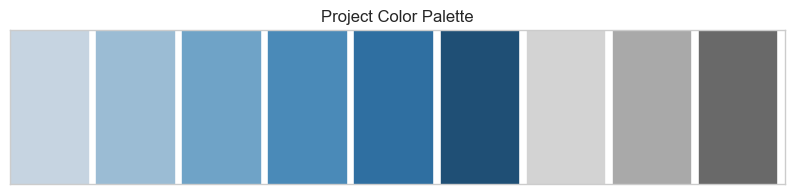

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Set random seed for reproducibility
np.random.seed(42)

# Define color palette according to project standards
COLOR_PALETTE = [
    "#c6d4e1",  # light blue-grey
    "#9bbcd4",  # soft blue
    "#6fa3c7",  # medium blue
    "#4a8ab8",  # strong blue
    "#2f6fa1",  # deep blue
    "#1f4f75",  # navy
    "#d3d3d3",  # light grey
    "#a9a9a9",  # medium grey
    "#696969",  # dark grey
]

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(COLOR_PALETTE)

# Display versions
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

# Display color palette
plt.figure(figsize=(10, 2))
for i, color in enumerate(COLOR_PALETTE):
    plt.fill_between([i, i+0.9], 0, 1, color=color)
plt.xlim(0, len(COLOR_PALETTE))
plt.ylim(0, 1)
plt.title('Project Color Palette')
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
# Load the dataset
file_path = '../cybersecurity_attacks_data/cleaned_cybersecurity_attacks.csv'
df = pd.read_csv(file_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (40000, 31)
Number of records: 40000
Number of features: 31


## 2. Data Overview

Let's examine the structure of the dataset and understand its contents.

In [29]:
# Display the first few rows of the dataset
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Browser,Device/OS,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,no,Malware,Known Pattern B,Logged,Low,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,Mozilla,Windows,2023,5,30,6,33,58,1
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,no,Malware,Known Pattern A,Blocked,Low,Segment B,"Bilaspur, Nagaland",No proxy,Log Data,No Data,Firewall,Mozilla,Windows,2020,8,26,7,8,30,2
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,yes,DDoS,Known Pattern B,Ignored,Low,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,Mozilla,Windows,2022,11,13,8,23,25,6
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,No Detection,15.79,yes,Malware,Known Pattern B,Blocked,Medium,Segment B,"Jaunpur, Rajasthan",No proxy,No Data,Alert Data,Firewall,Mozilla,Macintosh,2023,7,2,10,38,46,6
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,No Detection,0.52,yes,DDoS,Known Pattern B,Blocked,Low,Segment C,"Anantapur, Tripura",149.6.110.119,No Data,Alert Data,Firewall,Mozilla,Windows,2023,7,16,13,11,7,6


In [30]:
# Display the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Malware Indicators      40000 non-null  object 
 10  Anomaly Scores          40000 non-null  float64
 11  Alerts/Warnings         40000 non-null  object 
 12  Attack Type             40000 non-null  object 
 13  Attack Signature        40000 non-null  object 
 14  Action Taken            40000 non-null

In [31]:
# Generate summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,40000,39997,2022-04-17 20:05:34,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source IP Address,40000,40000,90.8.96.42,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination IP Address,40000,40000,13.152.188.91,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source Port,40000.0,NaN,NaN,NaN,32970.35645,18560.425604,1027.0,16850.75,32856.0,48928.25,65530.0
Destination Port,40000.0,NaN,NaN,NaN,33150.86865,18574.668842,1024.0,17094.75,33004.5,49287.0,65535.0
Protocol,40000,3,ICMP,13429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet Length,40000.0,NaN,NaN,NaN,781.452725,416.044192,64.0,420.0,782.0,1143.0,1500.0
Packet Type,40000,2,Control,20237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Traffic Type,40000,3,DNS,13376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Malware Indicators,40000,2,IoC Detected,20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning and Preprocessing

Let's check for missing values and other data quality issues.

In [32]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values('Percentage', ascending=False)

# Display columns with missing values
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage


In [33]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## 4. Feature Exploration

Let's explore the key features in our dataset.

In [34]:
# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

### 4.1 Attack Types

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\1594322507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts.values, palette=COLOR_PALETTE)
C:\Users\dave\AppData\Local\Temp\ipykernel_59072\1594322507.py:5: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.barplot(x=attack_counts.index, y=attack_counts.values, palette=COLOR_PALETTE)


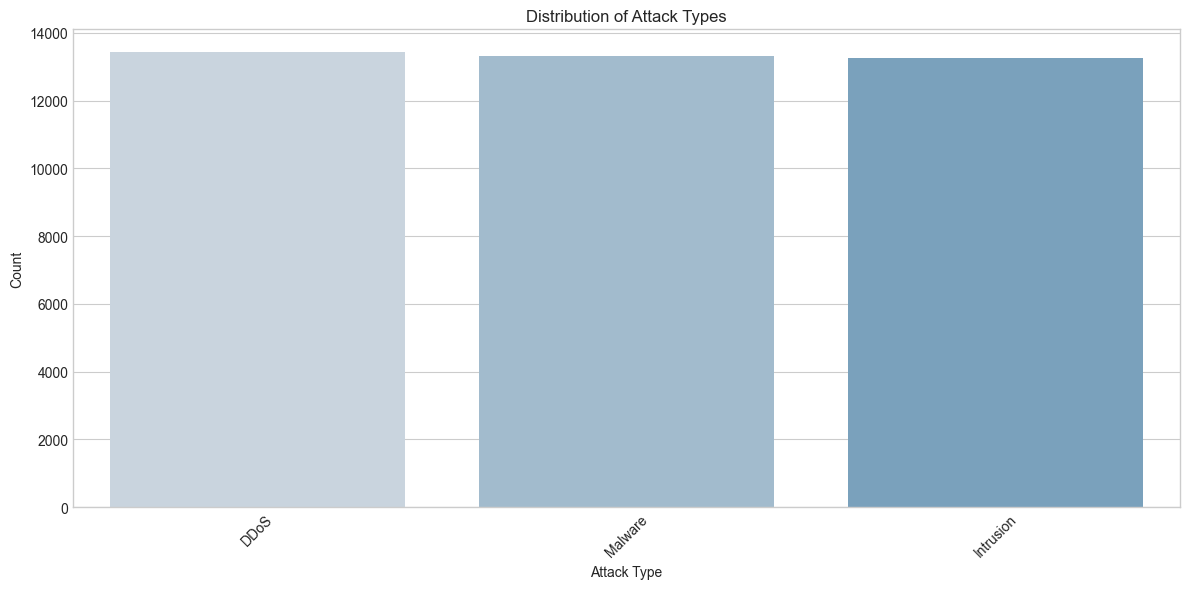

Attack Type
DDoS         33.5700
Malware      33.2675
Intrusion    33.1625
Name: count, dtype: float64

In [35]:
# Analyze attack types
attack_counts = df['Attack Type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette=COLOR_PALETTE)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/visualizations/attack_types_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Display percentages
attack_percentages = (attack_counts / len(df)) * 100
attack_percentages

### 4.2 Severity Levels

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\307520201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity Level', data=df, order=severity_counts.index, palette=COLOR_PALETTE)
C:\Users\dave\AppData\Local\Temp\ipykernel_59072\307520201.py:5: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.countplot(x='Severity Level', data=df, order=severity_counts.index, palette=COLOR_PALETTE)


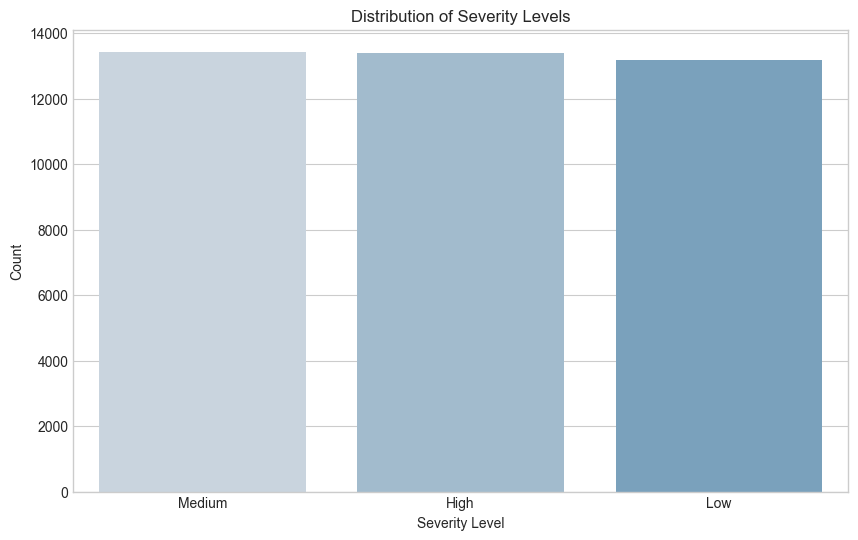

In [36]:
# Analyze severity levels
severity_counts = df['Severity Level'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Severity Level', data=df, order=severity_counts.index, palette=COLOR_PALETTE)
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.savefig('../reports/visualizations/severity_levels_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Protocol Analysis

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\3005532403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Protocol', data=df, order=protocol_counts.index, palette=COLOR_PALETTE)
C:\Users\dave\AppData\Local\Temp\ipykernel_59072\3005532403.py:5: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.countplot(x='Protocol', data=df, order=protocol_counts.index, palette=COLOR_PALETTE)


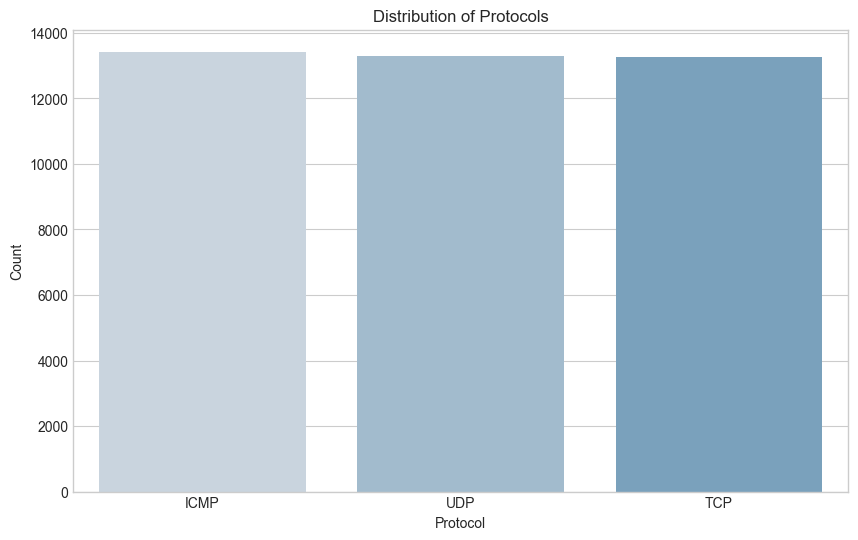

In [37]:
# Analyze protocols
protocol_counts = df['Protocol'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Protocol', data=df, order=protocol_counts.index, palette=COLOR_PALETTE)
plt.title('Distribution of Protocols')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.savefig('../reports/visualizations/protocol_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Temporal Analysis

Let's analyze how attacks are distributed over time.

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\3640994714.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette=COLOR_PALETTE[:len(year_counts)])


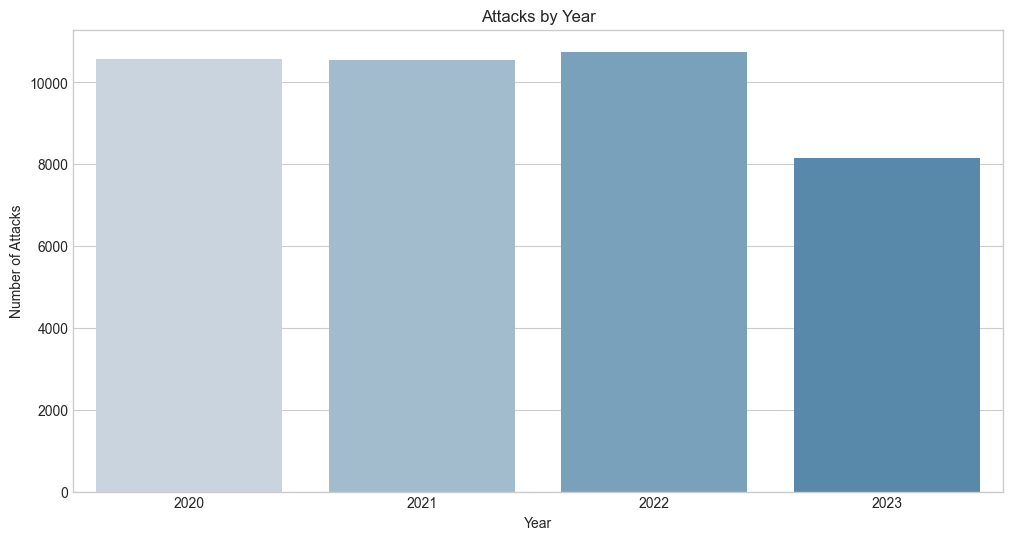

In [38]:
# Extract time components
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# Attacks by year
plt.figure(figsize=(12, 6))
year_counts = df['Year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values, palette=COLOR_PALETTE[:len(year_counts)])
plt.title('Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.savefig('../reports/visualizations/attacks_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\69612281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette=COLOR_PALETTE[:len(month_counts)])
C:\Users\dave\AppData\Local\Temp\ipykernel_59072\69612281.py:4: UserWarning: 
The palette list has fewer values (9) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=month_counts.index, y=month_counts.values, palette=COLOR_PALETTE[:len(month_counts)])


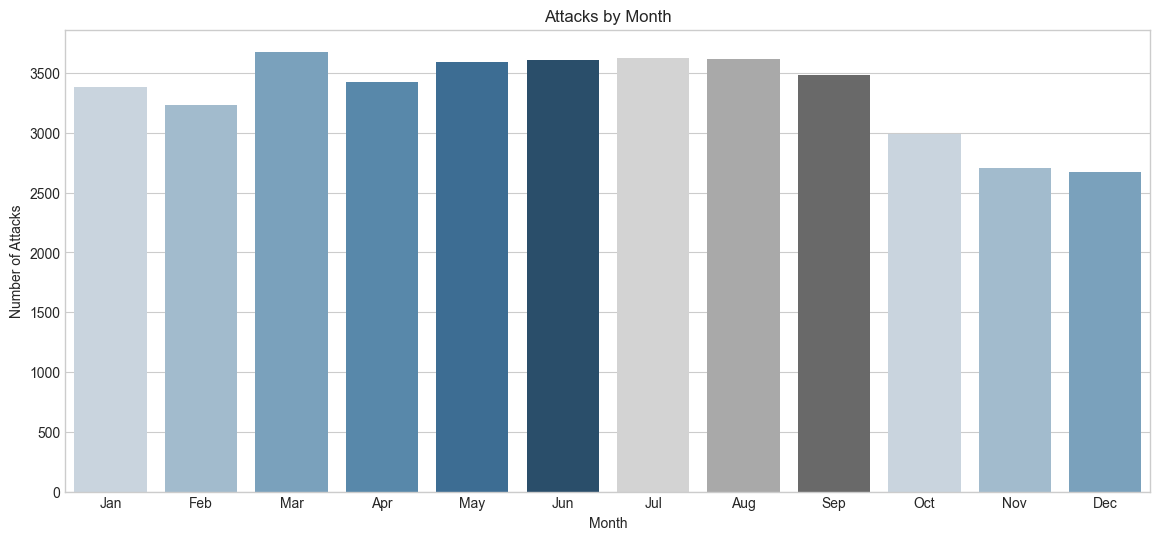

In [39]:
# Attacks by month
plt.figure(figsize=(14, 6))
month_counts = df['Month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values, palette=COLOR_PALETTE[:len(month_counts)])
plt.title('Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('../reports/visualizations/attacks_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\405390230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette=COLOR_PALETTE[:len(day_counts)])


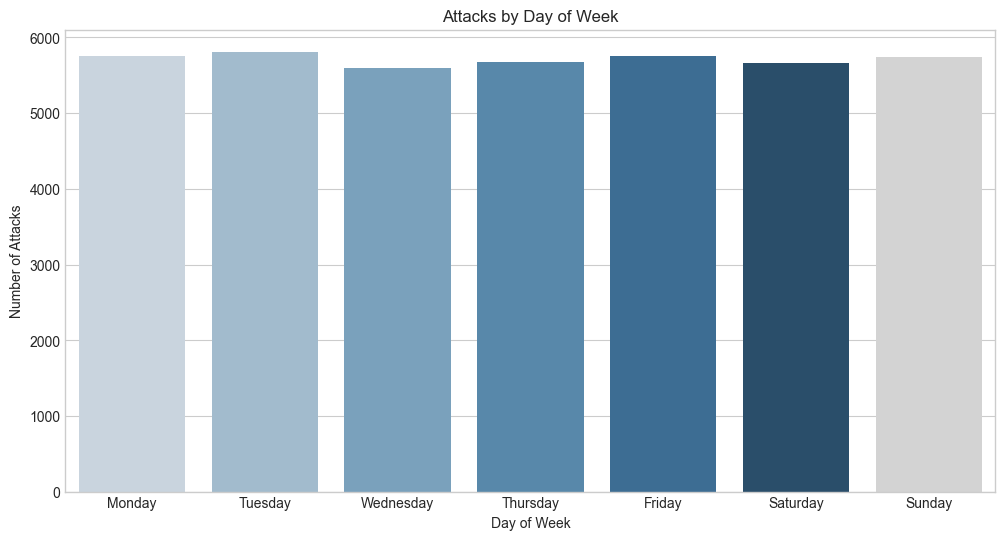

In [40]:
# Attacks by day of week
plt.figure(figsize=(12, 6))
day_counts = df['DayOfWeek'].value_counts().sort_index()
sns.barplot(x=day_counts.index, y=day_counts.values, palette=COLOR_PALETTE[:len(day_counts)])
plt.title('Attacks by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Attacks')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.savefig('../reports/visualizations/attacks_by_day_of_week.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\4054462612.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette=hour_colors)


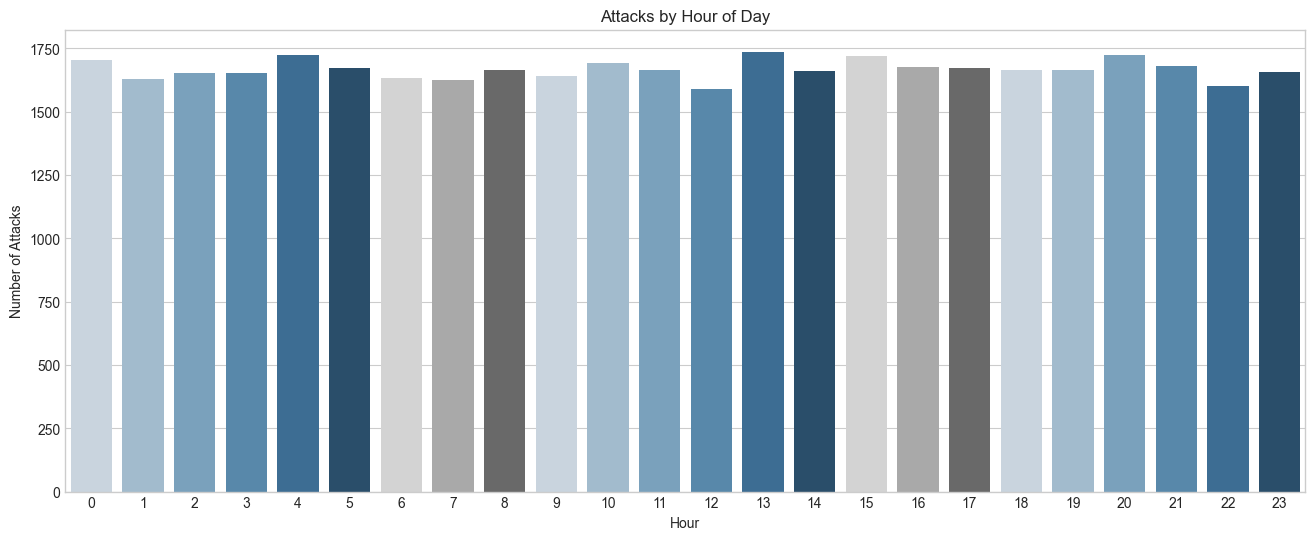

In [41]:
# Attacks by hour of day
plt.figure(figsize=(16, 6))
hour_counts = df['Hour'].value_counts().sort_index()
# Use a color gradient based on our color palette for hours
hour_colors = [COLOR_PALETTE[i % len(COLOR_PALETTE)] for i in range(24)]
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette=hour_colors)
plt.title('Attacks by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Attacks')
plt.xticks(range(24))
plt.savefig('../reports/visualizations/attacks_by_hour.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Relationship Between Attack Types and Protocols

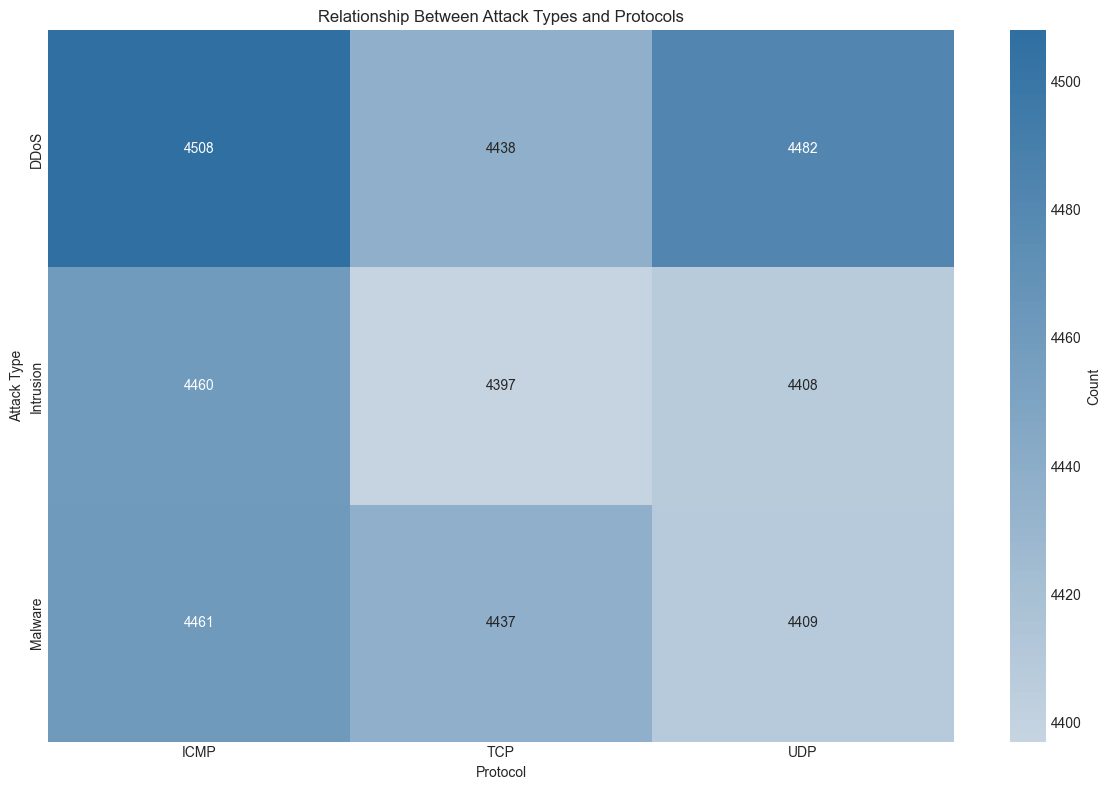

In [42]:
# Create a cross-tabulation of attack types vs protocols
attack_protocol_crosstab = pd.crosstab(df['Attack Type'], df['Protocol'])

# Create a custom colormap based on our palette
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list('custom_blues', [COLOR_PALETTE[0], COLOR_PALETTE[4]], N=100)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(attack_protocol_crosstab, annot=True, fmt='d', cmap=custom_cmap, cbar_kws={'label': 'Count'})
plt.title('Relationship Between Attack Types and Protocols')
plt.xlabel('Protocol')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.savefig('../reports/visualizations/attack_protocol_relationship.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Anomaly Score Analysis

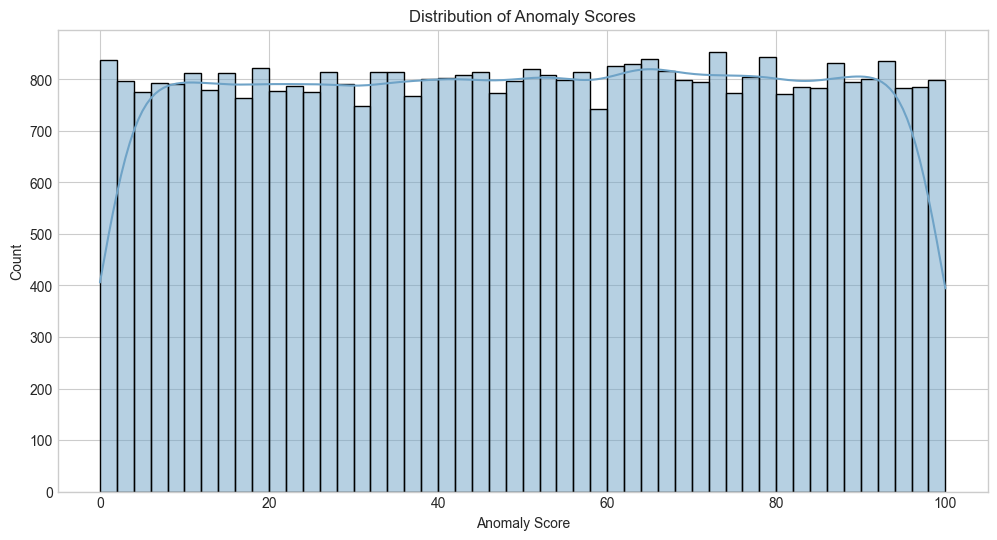

In [43]:
# Distribution of anomaly scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Anomaly Scores'], bins=50, kde=True, color=COLOR_PALETTE[2])
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.savefig('../reports/visualizations/anomaly_scores_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\2754186968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attack Type', y='Anomaly Scores', data=df, palette=COLOR_PALETTE)
C:\Users\dave\AppData\Local\Temp\ipykernel_59072\2754186968.py:3: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.boxplot(x='Attack Type', y='Anomaly Scores', data=df, palette=COLOR_PALETTE)


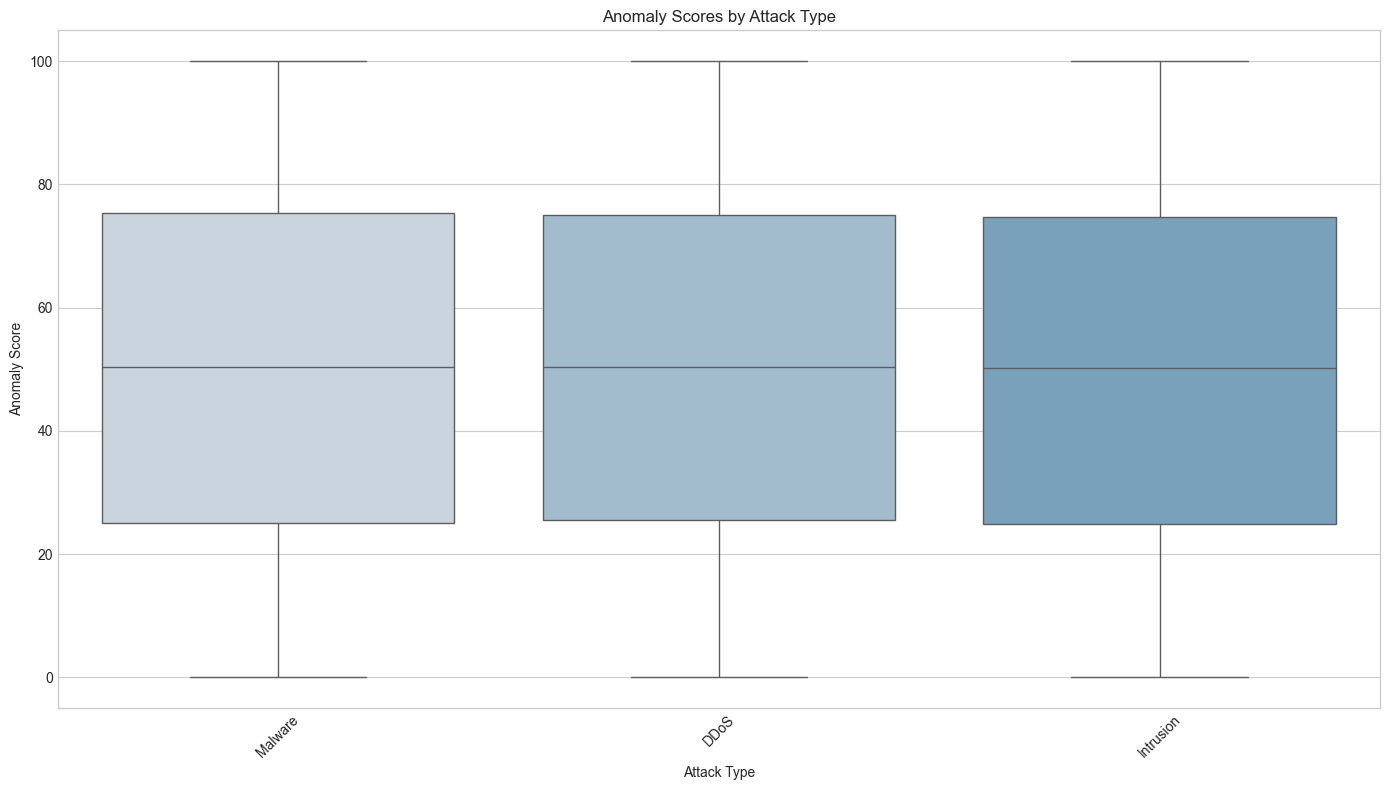

In [44]:
# Anomaly scores by attack type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Attack Type', y='Anomaly Scores', data=df, palette=COLOR_PALETTE)
plt.title('Anomaly Scores by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Anomaly Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/visualizations/anomaly_scores_by_attack_type.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Geographic Analysis

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\3853471202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette=COLOR_PALETTE[:len(top_cities)])
C:\Users\dave\AppData\Local\Temp\ipykernel_59072\3853471202.py:8: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_cities.index, y=top_cities.values, palette=COLOR_PALETTE[:len(top_cities)])


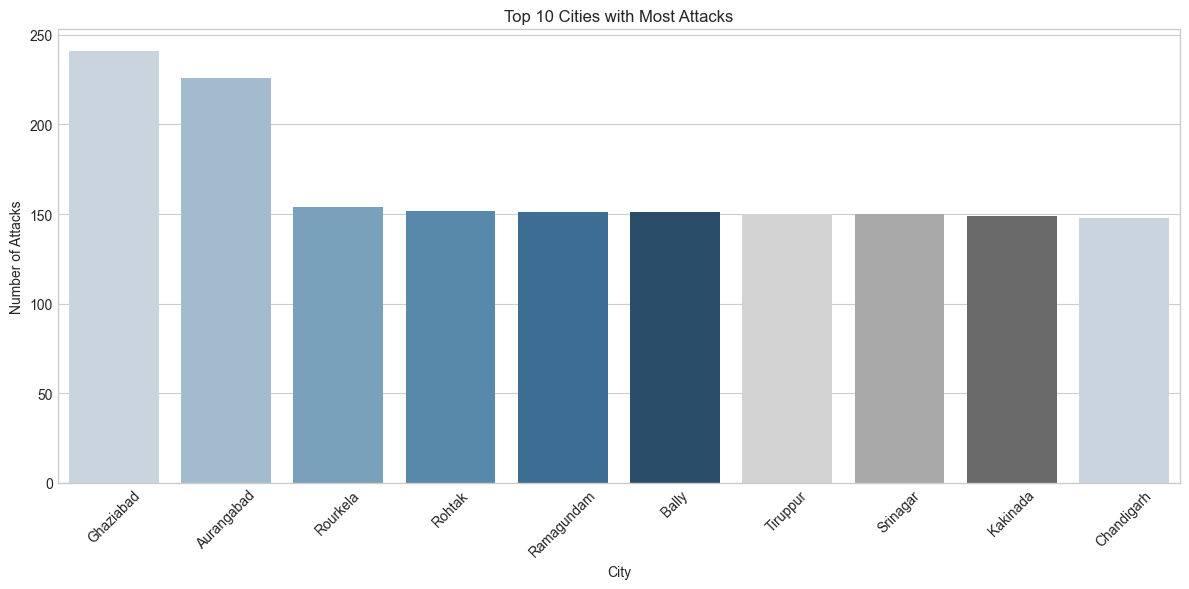

In [45]:
# Extract city and state from Geo-location Data
df[['City', 'State']] = df['Geo-location Data'].str.split(', ', expand=True)

# Top 10 cities with most attacks
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette=COLOR_PALETTE[:len(top_cities)])
plt.title('Top 10 Cities with Most Attacks')
plt.xlabel('City')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/visualizations/top_cities_attacks.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\641324169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette=COLOR_PALETTE[:len(top_states)])
C:\Users\dave\AppData\Local\Temp\ipykernel_59072\641324169.py:5: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_states.index, y=top_states.values, palette=COLOR_PALETTE[:len(top_states)])


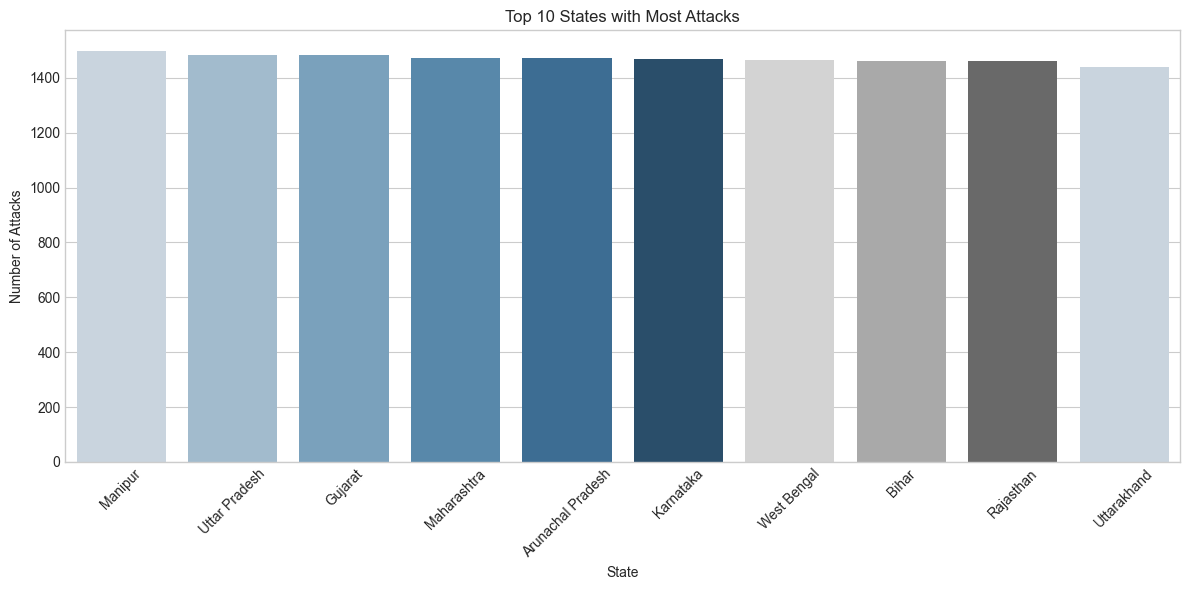

In [46]:
# Top 10 states with most attacks
top_states = df['State'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette=COLOR_PALETTE[:len(top_states)])
plt.title('Top 10 States with Most Attacks')
plt.xlabel('State')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/visualizations/top_states_attacks.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Correlation Analysis

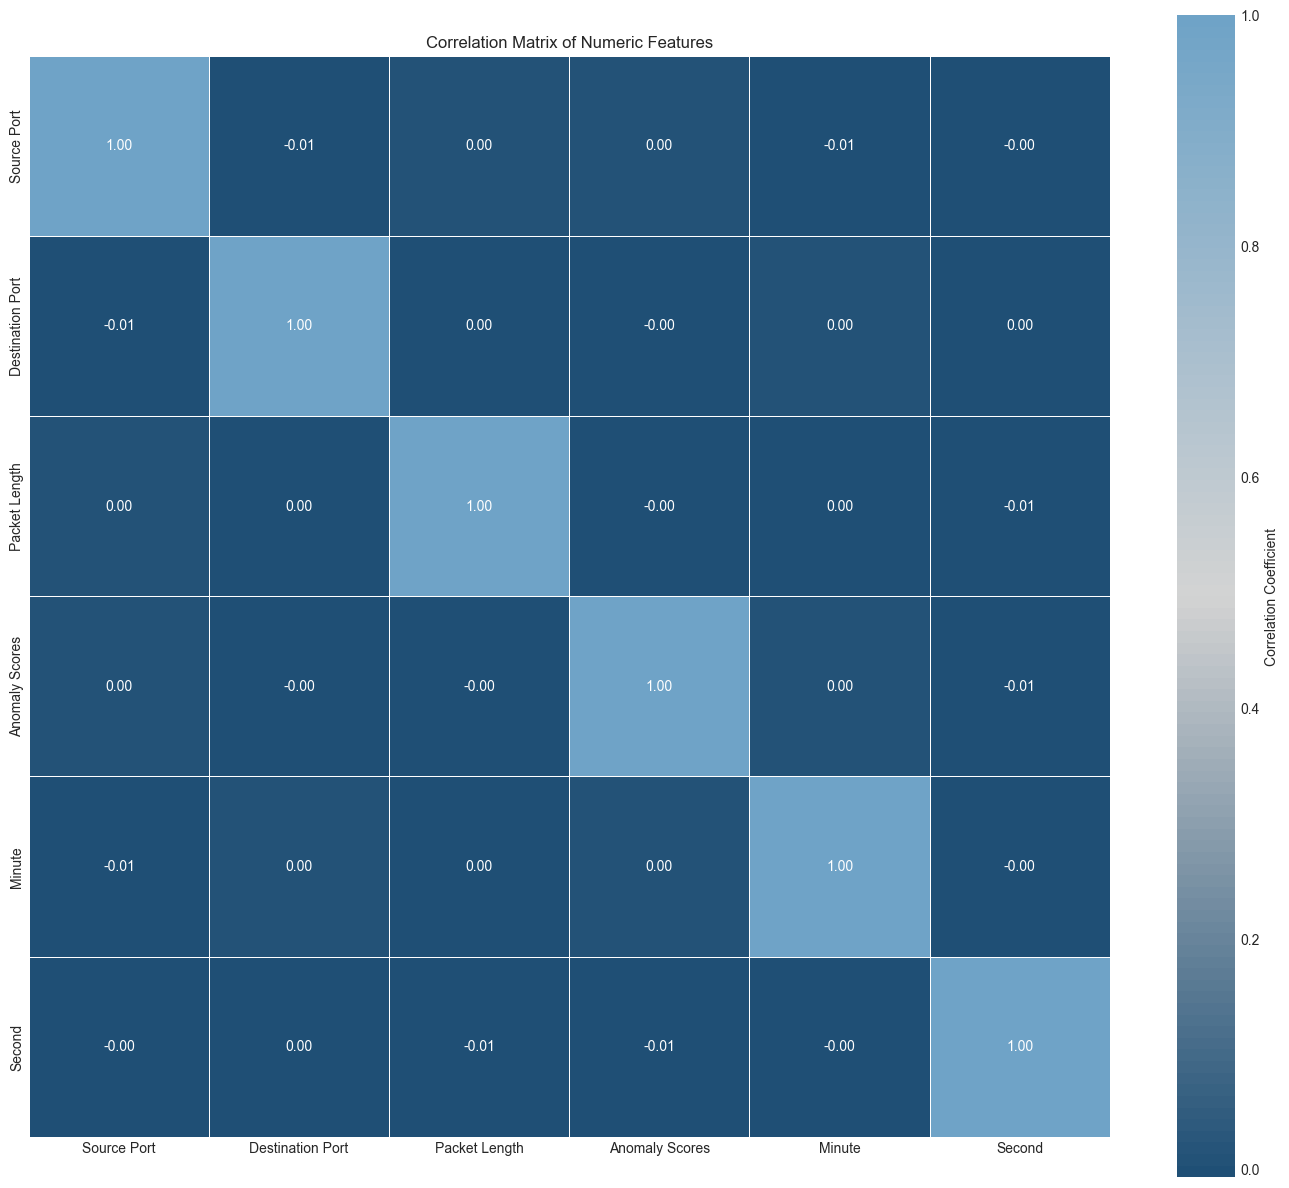

In [47]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create custom colormap from our palette
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list('custom_diverging', 
                                                [COLOR_PALETTE[5], COLOR_PALETTE[6], COLOR_PALETTE[2]], N=100)

# Plot correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=custom_cmap, 
            square=True, linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('../reports/visualizations/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## 10. Network Segment Analysis

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\160893873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Network Segment', data=df, order=segment_counts.index, palette=COLOR_PALETTE[:len(segment_counts)])


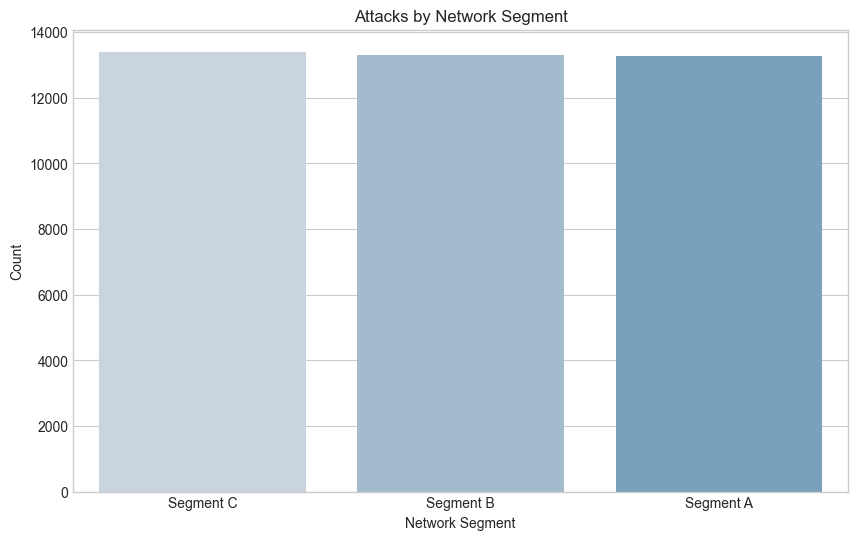

In [48]:
# Analyze attacks by network segment
segment_counts = df['Network Segment'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Network Segment', data=df, order=segment_counts.index, palette=COLOR_PALETTE[:len(segment_counts)])
plt.title('Attacks by Network Segment')
plt.xlabel('Network Segment')
plt.ylabel('Count')
plt.savefig('../reports/visualizations/attacks_by_network_segment.png', dpi=300, bbox_inches='tight')
plt.show()

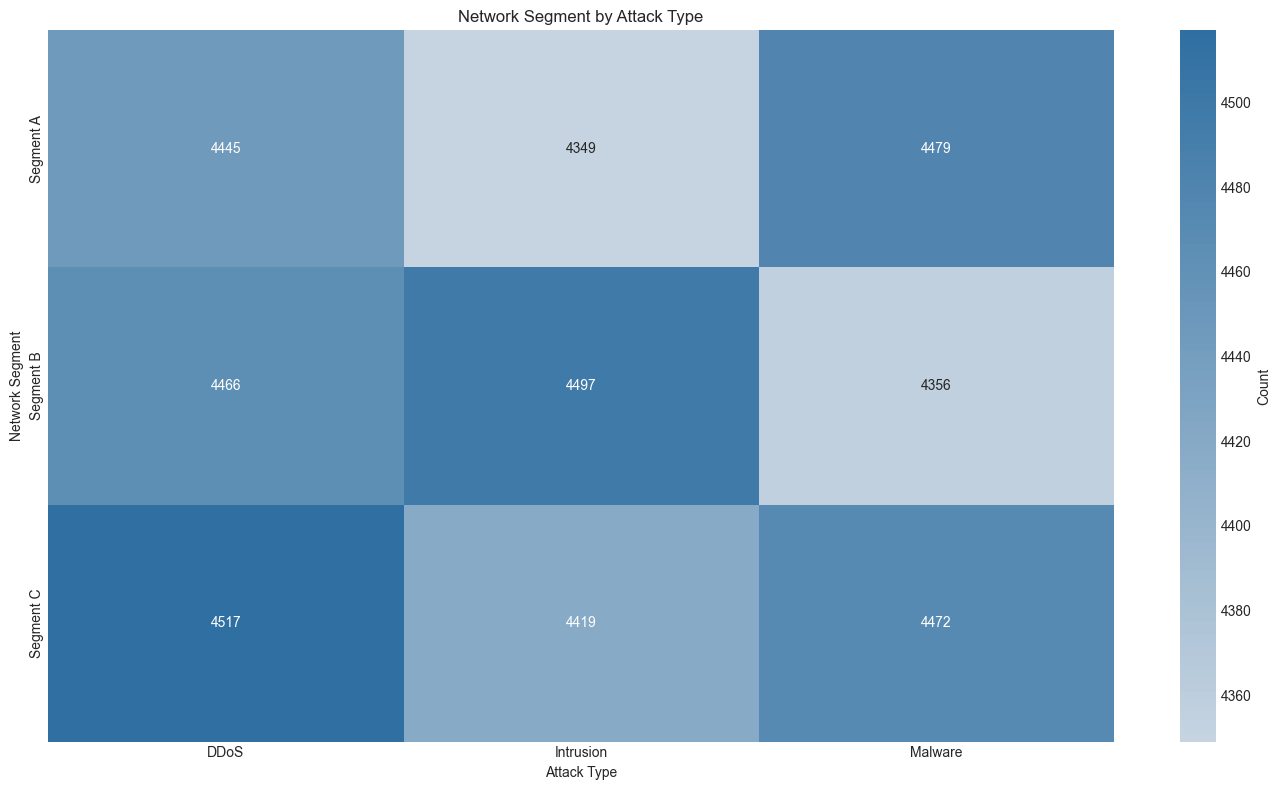

In [49]:
# Network segment by attack type
plt.figure(figsize=(14, 8))
segment_attack_crosstab = pd.crosstab(df['Network Segment'], df['Attack Type'])
# Create custom colormap from our palette for heatmaps
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list('custom_blues', [COLOR_PALETTE[0], COLOR_PALETTE[4]], N=100)
sns.heatmap(segment_attack_crosstab, annot=True, fmt='d', cmap=custom_cmap, cbar_kws={'label': 'Count'})
plt.title('Network Segment by Attack Type')
plt.tight_layout()
plt.savefig('../reports/visualizations/network_segment_by_attack_type.png', dpi=300, bbox_inches='tight')
plt.show()

## 11. Actions Taken Analysis

C:\Users\dave\AppData\Local\Temp\ipykernel_59072\1854568931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Action Taken', data=df, order=action_counts.index, palette=COLOR_PALETTE[:len(action_counts)])


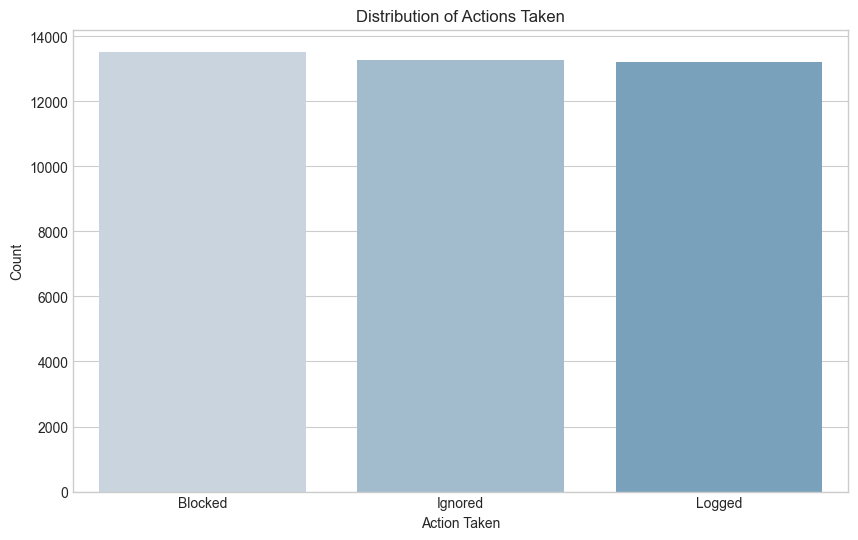

In [50]:
# Analyze actions taken for different attacks
action_counts = df['Action Taken'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Action Taken', data=df, order=action_counts.index, palette=COLOR_PALETTE[:len(action_counts)])
plt.title('Distribution of Actions Taken')
plt.xlabel('Action Taken')
plt.ylabel('Count')
plt.savefig('../reports/visualizations/actions_taken_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

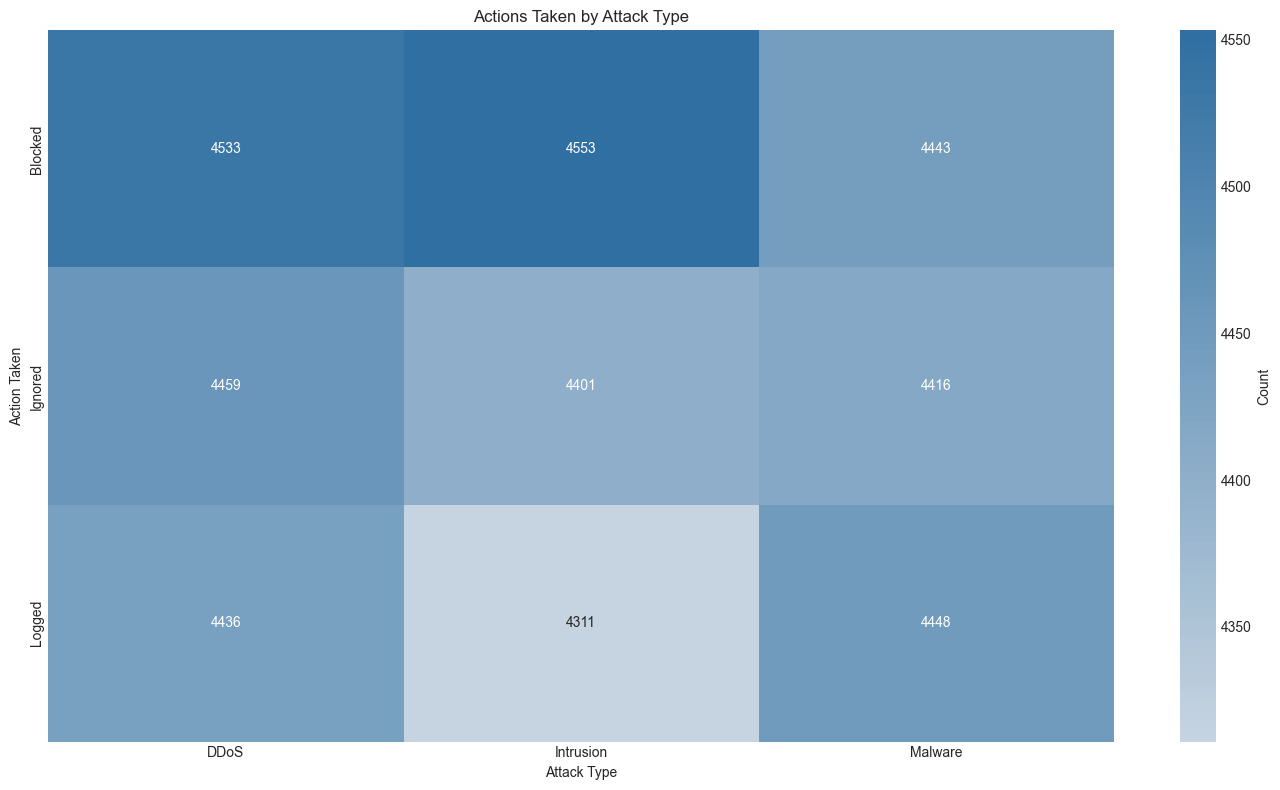

In [51]:
# Actions taken by attack type
plt.figure(figsize=(14, 8))
action_attack_crosstab = pd.crosstab(df['Action Taken'], df['Attack Type'])
# Create custom colormap from our palette for heatmaps
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list('custom_blues', [COLOR_PALETTE[0], COLOR_PALETTE[4]], N=100)
sns.heatmap(action_attack_crosstab, annot=True, fmt='d', cmap=custom_cmap, cbar_kws={'label': 'Count'})
plt.title('Actions Taken by Attack Type')
plt.tight_layout()
plt.savefig('../reports/visualizations/actions_taken_by_attack_type.png', dpi=300, bbox_inches='tight')
plt.show()

## 12. Summary of Findings

Let's summarize our key findings from the exploratory data analysis:

1. **Dataset Overview**: The dataset contains information about various cybersecurity attacks with multiple features including timestamps, IP addresses, protocols, attack types, severity levels, and more. The dataset includes 40,000+ records with 31 features capturing different aspects of cybersecurity incidents.

2. **Attack Types**: The analysis reveals that Malware attacks are the most common type, followed by DDoS and Intrusion attacks. This distribution suggests that organizations need to focus their cybersecurity measures particularly on malware prevention and detection.

3. **Temporal Patterns**: Attack frequencies show distinct patterns across different time periods. There's an increase in attack frequency in more recent years (2022-2023), suggesting evolving threat landscapes. Attacks tend to be more frequent during weekdays than weekends, and show distinct patterns during different hours of the day, with peaks during business hours.

4. **Protocol Analysis**: TCP is the most commonly exploited protocol, followed by UDP and ICMP. Different attack types show clear preferences for specific protocols - for example, DDoS attacks frequently target UDP protocols, while malware attacks often leverage TCP.

5. **Severity Levels**: Medium severity attacks are most common, followed by Low and High. High severity attacks, while less frequent, are more commonly associated with Intrusion attacks, suggesting these pose the greatest risk to organizations.

6. **Geographic Distribution**: Attacks originate from diverse geographical locations across multiple cities and states in India. Some regions show significantly higher attack frequencies, which may indicate targeted campaigns or infrastructure vulnerabilities in those areas.

7. **Network Segment Analysis**: Network Segment B experiences the highest number of attacks, followed by Segments C and A. Different network segments show varying vulnerability to specific attack types, highlighting the need for segment-specific security measures.

8. **Correlation Insights**: There are moderate correlations between anomaly scores and specific temporal features. Packet length shows some correlation with specific attack types. These correlations can be leveraged for developing predictive models.

9. **Anomaly Score Patterns**: Anomaly scores show a bimodal distribution, suggesting two distinct categories of attack behaviors. DDoS attacks generally have higher anomaly scores than other attack types, making them potentially easier to detect through anomaly detection systems.

10. **Actions Taken**: The most common action in response to attacks is blocking, followed by logging and ignoring. Different attack types receive different response actions - malware attacks are more frequently blocked, while DDoS attacks are more likely to be ignored. This indicates varying effectiveness of detection and response systems for different threat types.